In [1]:
#Imports
import matplotlib.pyplot as plt
from numpy import linspace, exp, sqrt, pi

In [2]:
#Constants
c = 3*10**10            #speed of light [cm/s]
B = 13.6                #binding energy [eV]
T_0 = 2.33*10**-4       #CMB background temperature [eV]
m_0 = 0.3               #density of matter
m_H = 9.39*10**8        #mass of hydrogen [eV]
m_p = 9.38*10**8        #mass of protons [eV]
m_e = 5.11*10**5        #mass of electrons [eV]
u_H = 0                 #chemical potential of hydrogen [eV]
u_p = 0                 #chemical potential of protons [eV]
u_e = 0                 #chemical potential of electrons [eV]
eta = 5*10**-10         #baryon to photon ratio
n_b0 = 2.5*10**-7       #current baryon density [1/cm^3]
M_pl = 1.2*10**28       #planck mass [eV]
hbar = 6.58*10**-16     #reduced planck constant [eV*s]
sigma_T = 6.65*10**-25  #cross section of Thompson scattering [cm^2]


#Defining a function to calculate the Hubble parameter H for a given temperature T
def H(g_eff, T):
    return (1.66 * sqrt(g_eff) * (T**2)) / (M_pl * hbar * c)  #divided by hbar*c to get [1/cm]


#Defining a function to calculate the number density n_i for a given particle i
def n_i(g_i, m_i, u_i, T):
    return g_i * (((m_i * T) / (2 * pi))**(3/2)) * exp((u_i - m_i) / T)


#Defining a function to calculate the Saha Equation S
def Saha(T):
    return ((2.4 * eta) / (pi**2)) * (((2 * pi * T) / m_e)**(3/2)) * exp(B / T)


#Defining a function to calculate the Ionization Fraction X_e
def X_e(T):
    return (-1 + sqrt(1 + (4 * Saha(T)))) / (2 * Saha(T))


#Defining a function to calculate the reaction rate for Thompson scattering
def reaction_T(T):
    return X_e(T) * n_b0 * sigma_T * ((T / T_0)**3)


#Defining a function to calculate the reaction rate for Rayleigh scattering
def reaction_R(T):
    return (1 - X_e(T)) * n_b0 * sigma_T * ((T**7) / ((B**4) * (T_0**3)))


#Defining a function to calculate the reaction rate for Recombination
def reaction_rec(T):
    return ((1.4*10**-13) * X_e(T) * n_b0 * ((T**(5/2)) / (T_0**3))) / c  #divided by c to get [1/cm]

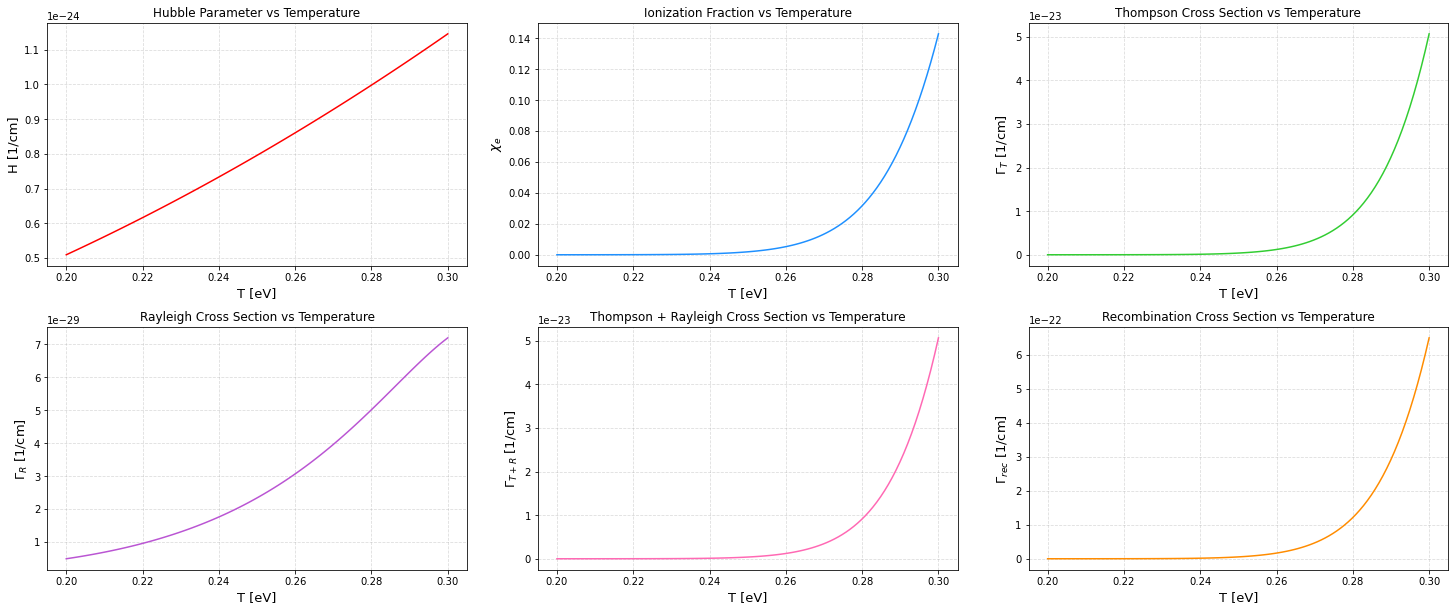

In [3]:
#Range of temperatures to evaluate for each function
T_list = linspace(0.2, 0.3, 100)

#Creating lists for each function
H_list = []
X_e_list = []
reaction_T_list = []
reaction_R_list = []
reaction_TR_list = []
reaction_rec_list = []


#Loop to evaluate each function and append values to the respective lists
for T in T_list:
    H_list.append(H(3.3, T))  #geff = 3.3 at recombination 
    X_e_list.append(X_e(T))
    reaction_T_list.append(reaction_T(T))
    reaction_R_list.append(reaction_R(T))
    reaction_TR_list.append(reaction_T(T) + reaction_R(T))
    reaction_rec_list.append(reaction_rec(T))
    

#Plotting the figures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (21, 9), gridspec_kw = {'width_ratios': [1, 1, 1]})
fig.tight_layout(pad = 4.0)
ax1.plot(T_list, H_list, linestyle = 'solid', color = 'red')
ax1.set_xlabel('T [eV]', fontsize = 13)
ax1.set_ylabel('H [1/cm]', fontsize = 13)
ax1.set_title('Hubble Parameter vs Temperature')
ax1.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')
ax2.plot(T_list, X_e_list, linestyle = 'solid', color = 'dodgerblue')
ax2.set_xlabel('T [eV]', fontsize = 13)
ax2.set_ylabel('$\chi_e$', fontsize = 13)
ax2.set_title('Ionization Fraction vs Temperature')
ax2.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')
ax3.plot(T_list, reaction_T_list, linestyle = 'solid', color = 'limegreen')
ax3.set_xlabel('T [eV]', fontsize = 13)
ax3.set_ylabel('$\Gamma_T$ [1/cm]', fontsize = 13)
ax3.set_title('Thompson Cross Section vs Temperature')
ax3.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')
ax4.plot(T_list, reaction_R_list, linestyle = 'solid', color = 'mediumorchid')
ax4.set_xlabel('T [eV]', fontsize = 13)
ax4.set_ylabel('$\Gamma_R$ [1/cm]', fontsize = 13)
ax4.set_title('Rayleigh Cross Section vs Temperature')
ax4.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')
ax5.plot(T_list, reaction_TR_list, linestyle = 'solid', color = 'hotpink')
ax5.set_xlabel('T [eV]', fontsize = 13)
ax5.set_ylabel('$\Gamma_{T+R}$ [1/cm]', fontsize = 13)
ax5.set_title('Thompson + Rayleigh Cross Section vs Temperature')
ax5.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')
ax6.plot(T_list, reaction_rec_list, linestyle = 'solid', color = 'darkorange')
ax6.set_xlabel('T [eV]', fontsize = 13)
ax6.set_ylabel('$\Gamma_{rec}$ [1/cm]', fontsize = 13)
ax6.set_title('Recombination Cross Section vs Temperature')
ax6.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')

Stopped at index = 56.
The expansion rate becomes greater than the Thompson + Rayleigh reaction rate at T = 0.257eV.
Stopped at index = 32.
The expansion rate becomes greater than the Recombination reaction rate at T = 0.232eV.
The ionization fraction of hydrogen at T = 0.23eV is Xe = 2.535E-04.


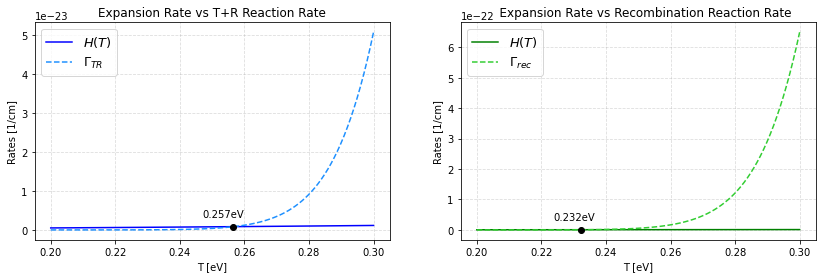

In [4]:
#Loop to find the temperature at which the Hubble parameter 
#becomes greater than the Thompson + Rayleigh reaction rate
for index in range(len(T_list)):
    if reaction_TR_list[index] >= H_list[index]:
        print('Stopped at index =', str(index-1)+'.')
        print('The expansion rate becomes greater than the Thompson + Rayleigh reaction rate at T =',
              str(round(T_list[index-1], 3))+'eV.')
        break
    else:
        continue


#Loop to find the temperature at which the Hubble parameter 
#becomes greater than the Recombination reaction rate
for index in range(len(T_list)):
    if reaction_rec_list[index] >= H_list[index]:
        print('Stopped at index =', str(index-1)+'.')
        print('The expansion rate becomes greater than the Recombination reaction rate at T =',
              str(round(T_list[index-1], 3))+'eV.')
        print('The ionization fraction of hydrogen at T = 0.23eV is Xe =', '{:.3E}'.format(X_e_list[index-1])+'.')
        break
    else:
        continue
        
        
#Plotting the figures
fig, (ax7, ax8) = plt.subplots(1, 2, figsize = (14, 4), gridspec_kw = {'width_ratios': [1, 1]})
ax7.plot(T_list, H_list, linestyle = 'solid', color = 'blue', label = '$H(T)$')
ax7.plot(T_list, reaction_TR_list, linestyle = 'dashed', color = 'dodgerblue', label = '$\Gamma_{TR}$')
ax7.plot([T_list[56]], [H_list[56]], '-ko')
ax7.set_xlabel('T [eV]')
ax7.set_ylabel('Rates [1/cm]')
ax7.set_title('Expansion Rate vs T+R Reaction Rate')
ax7.annotate('0.257eV', (T_list[53], H_list[53]), textcoords = 'offset points', xytext = (0, 10), ha = 'center')
ax7.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')
ax7.legend(loc = 'upper left', prop = {'size': 13})
ax8.plot(T_list, H_list, linestyle = 'solid', color = 'green',label = '$H(T)$')
ax8.plot(T_list, reaction_rec_list, linestyle = 'dashed', color = 'limegreen', label = '$\Gamma_{rec}$')
ax8.plot([T_list[32]], [H_list[32]], '-ko')
ax8.set_xlabel('T [eV]')
ax8.set_ylabel('Rates [1/cm]')
ax8.set_title('    Expansion Rate vs Recombination Reaction Rate')
ax8.annotate('0.232eV', (T_list[30], H_list[30]), textcoords = 'offset points', xytext = (0, 10), ha = 'center')
ax8.grid(alpha = 0.4, linestyle = 'dashed', color = 'darkgray')
ax8.legend(loc = 'upper left', prop = {'size': 13})